In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and insights on the dataset

In [2]:
dfm=pd.read_csv('D3.csv')
dfm.head()

,admission_id,gender,fee_range,fee_slab,loan,req_branch,alloted_branch,campus_req,campus_allotted,entrance_rank,admission_acceptance
0,QAHF7680,Male,42967.60,37590.75,No,Mechanical Engineering,Computer Science,City Campus,City Campus,971,No
1,KAFN0165,Male,75113.66,45560.81,No,Mechanical Engineering,Information Technology,City Campus,Suburban Campus,578,No
2,FPVA8631,Male,50439.62,28703.58,No,Mechanical Engineering,Electrical Engineering,Main Campus,City Campus,927,No
3,YICC8687,Male,61341.87,24546.13,No,Computer Science,Information Technology,City Campus,Main Campus,625,No
4,NZJO8685,Female,61221.07,33893.19,No,Mechanical Engineering,Mechanical Engineering,Main Campus,City Campus,720,No


In [3]:
dfm.columns

Index(['admission_id', 'gender', 'fee_range', 'fee_slab', 'loan', 'req_branch',
       'alloted_branch', 'campus_req', 'campus_allotted', 'entrance_rank',
       'admission_acceptance'],
      dtype='object')

In [4]:
dfm.isnull().sum()

admission_id            0
gender                  0
fee_range               0
fee_slab                0
loan                    0
req_branch              0
alloted_branch          0
campus_req              0
campus_allotted         0
entrance_rank           0
admission_acceptance    0
dtype: int64

In [5]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   admission_id          1000 non-null   object 
 1   gender                1000 non-null   object 
 2   fee_range             1000 non-null   float64
 3   fee_slab              1000 non-null   float64
 4   loan                  1000 non-null   object 
 5   req_branch            1000 non-null   object 
 6   alloted_branch        1000 non-null   object 
 7   campus_req            1000 non-null   object 
 8   campus_allotted       1000 non-null   object 
 9   entrance_rank         1000 non-null   int64  
 10  admission_acceptance  1000 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB


In [6]:
dfm.dtypes

admission_id             object
gender                   object
fee_range               float64
fee_slab                float64
loan                     object
req_branch               object
alloted_branch           object
campus_req               object
campus_allotted          object
entrance_rank             int64
admission_acceptance     object
dtype: object

## Understanding on the features and basic renaming

In [7]:
dfm

,admission_id,gender,fee_range,fee_slab,loan,req_branch,alloted_branch,campus_req,campus_allotted,entrance_rank,admission_acceptance
0,QAHF7680,Male,42967.60,37590.75,No,Mechanical Engineering,Computer Science,City Campus,City Campus,971,No
1,KAFN0165,Male,75113.66,45560.81,No,Mechanical Engineering,Information Technology,City Campus,Suburban Campus,578,No
2,FPVA8631,Male,50439.62,28703.58,No,Mechanical Engineering,Electrical Engineering,Main Campus,City Campus,927,No
3,YICC8687,Male,61341.87,24546.13,No,Computer Science,Information Technology,City Campus,Main Campus,625,No
4,NZJO8685,Female,61221.07,33893.19,No,Mechanical Engineering,Mechanical Engineering,Main Campus,City Campus,720,No
...,...,...,...,...,...,...,...,...,...,...,...
995,KVGH9633,Male,35050.14,47725.23,Yes,Computer Science,Chemical Engineering,Suburban Campus,Main Campus,799,No
996,KWSC6731,Female,70374.72,39900.08,No,Mechanical Engineering,Information Technology,Main Campus,Suburban Campus,641,No
997,TYKI9800,Female,37509.33,46348.11,Yes,Computer Science,Computer Science,City Campus,City Campus,113,Yes
998,SNRT1371,Male,59358.78,27068.52,No,Electrical Engineering,Information Technology,City Campus,Main Campus,971,No


In [8]:

# Initialize LabelEncoder
from sklearn.calibration import LabelEncoder


le = LabelEncoder()

# List of columns to be encoded
categorical_columns = ['admission_id','gender', 'loan', 'req_branch', 'alloted_branch', 'campus_req', 'campus_allotted', 'admission_acceptance']

# Check if specified columns exist in the DataFrame
for col in categorical_columns:
    if col not in dfm.columns:
        print(f"Error: Column '{col}' not found in the DataFrame.")
        exit()

# Check if specified columns are of type 'object'
for col in categorical_columns:
    if dfm[col].dtype != 'object':
        print(f"Error: Column '{col}' is not of type 'object'.")
        exit()

# Apply label encoding to categorical features
dfm[categorical_columns] = dfm[categorical_columns].apply(lambda col: le.fit_transform(col))

# Convert all columns to float64
dfm = dfm.astype(float)


In [9]:
dfm

,admission_id,gender,fee_range,fee_slab,loan,req_branch,alloted_branch,campus_req,campus_allotted,entrance_rank,admission_acceptance
0,629.0,1.0,42967.60,37590.75,0.0,2.0,2.0,0.0,0.0,971.0,0.0
1,380.0,1.0,75113.66,45560.81,0.0,2.0,4.0,0.0,2.0,578.0,0.0
2,221.0,1.0,50439.62,28703.58,0.0,2.0,3.0,1.0,0.0,927.0,0.0
3,940.0,1.0,61341.87,24546.13,0.0,0.0,4.0,0.0,1.0,625.0,0.0
4,545.0,0.0,61221.07,33893.19,0.0,2.0,5.0,1.0,0.0,720.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,420.0,1.0,35050.14,47725.23,1.0,0.0,0.0,2.0,1.0,799.0,0.0
996,423.0,0.0,70374.72,39900.08,0.0,2.0,4.0,1.0,2.0,641.0,0.0
997,782.0,0.0,37509.33,46348.11,1.0,0.0,2.0,0.0,0.0,113.0,1.0
998,725.0,1.0,59358.78,27068.52,0.0,1.0,4.0,0.0,1.0,971.0,0.0


In [10]:
corr=dfm.corr()
corr.shape

(11, 11)

<Axes: >

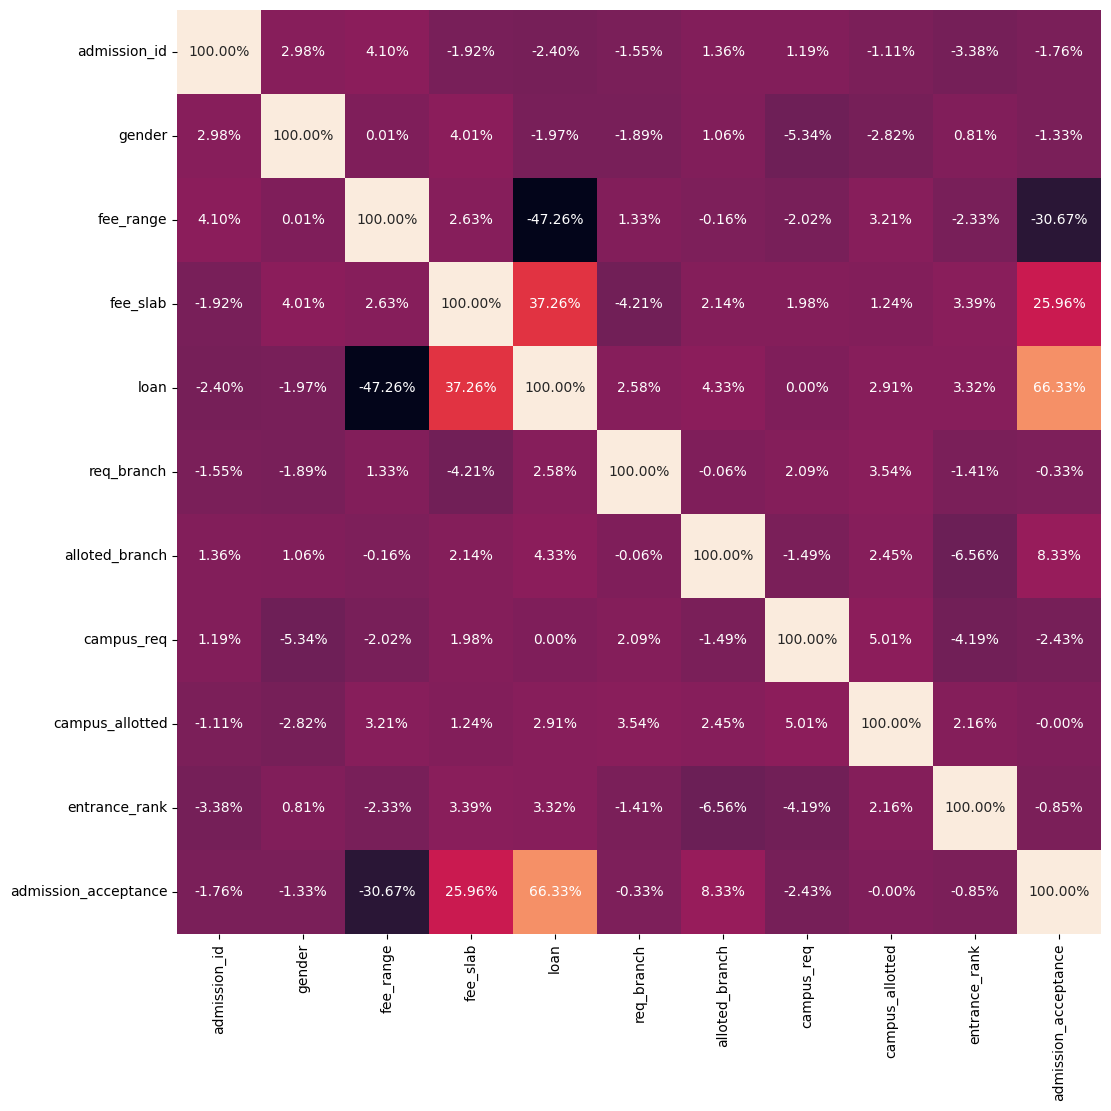

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=False, square= True, fmt='.2%', annot=True)

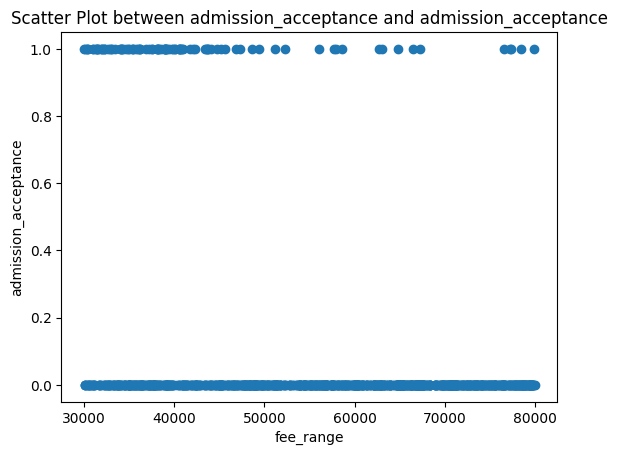

In [12]:
plt.scatter(dfm['fee_range'], dfm['admission_acceptance'])
plt.xlabel('fee_range')
plt.ylabel('admission_acceptance')
plt.title('Scatter Plot between admission_acceptance and admission_acceptance')
plt.show()

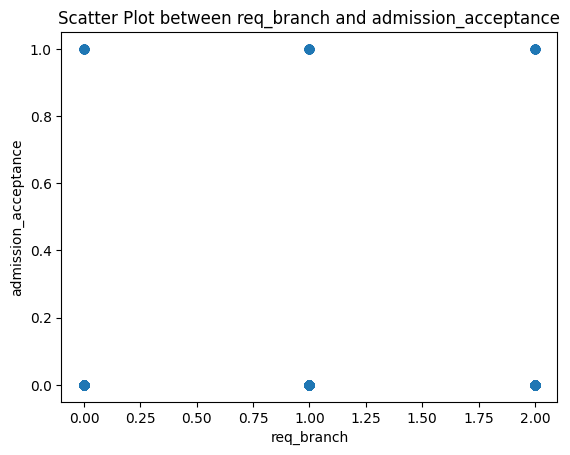

In [13]:
plt.scatter(dfm['req_branch'], dfm['admission_acceptance'])
plt.xlabel('req_branch')
plt.ylabel('admission_acceptance')
plt.title('Scatter Plot between req_branch and admission_acceptance')
plt.show()

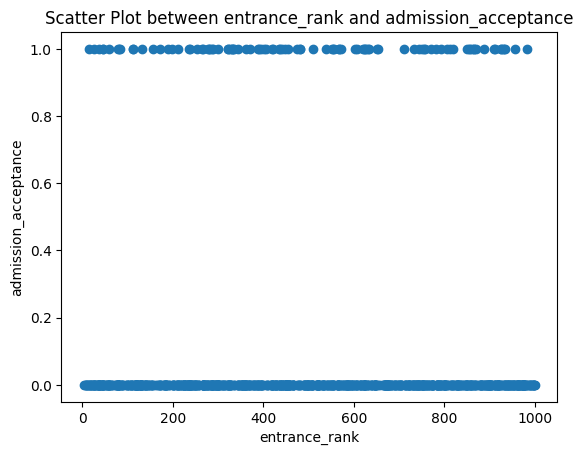

In [14]:
plt.scatter(dfm['entrance_rank'], dfm['admission_acceptance'])
plt.xlabel('entrance_rank')
plt.ylabel('admission_acceptance')
plt.title('Scatter Plot between entrance_rank and admission_acceptance')
plt.show()

## Splitting of the data

In [15]:
dfm.shape

(1000, 11)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfm.drop(['admission_acceptance'], axis = 1), dfm['admission_acceptance'], test_size=0.2)


In [17]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (800, 10)
X_test shape: (200, 10)
y_train shape: (800,)
y_test shape: (200,)


In [18]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

## Gradient Boost Classfier 

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [20]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
accuracies = cross_val_score(gradient_booster, X_train, y_train, cv=5)
gradient_booster.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gradient_booster.score(X_test,y_test))

Train Score: 0.91625
Test Score: 0.92


In [21]:
result_dict_train["Gradient-Boost Default Train Score"] = np.mean(accuracies)
result_dict_test["Gradient-Boost Default Test Score"] = gradient_booster.score(X_test,y_test)

In [22]:
from sklearn.metrics import accuracy_score
print("GBC accuracy is %2.2f" % accuracy_score(
     y_test, gradient_booster.predict(X_test)))

GBC accuracy is 0.92


In [23]:
from sklearn.metrics import classification_report

pred=gradient_booster.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       181
         1.0       0.58      0.58      0.58        19

    accuracy                           0.92       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.92      0.92      0.92       200



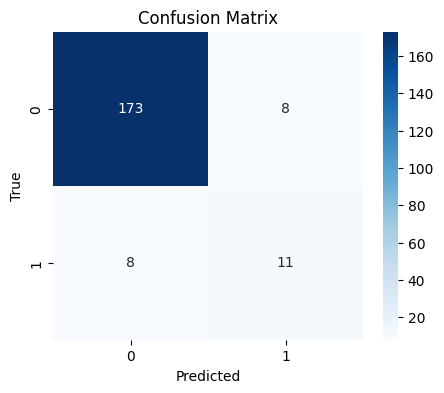

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gradient_booster and X_test, y_test are already defined

# Make predictions
pred = gradient_booster.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [25]:
grid = {
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':np.arange(100,500,100),
}

gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(X_train,y_train)
print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Train Score: 0.92875
Test Score: 0.925


In [26]:
result_dict_train["Gradient-Boost GridSearch Train Score"] = gb_cv.best_score_
result_dict_test["Gradient-Boost GridSearch Test Score"] = gb_cv.score(X_test,y_test)

In [27]:
grid = {'max_depth':[2,3,4,5,6,7] }

gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=400)

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'max_depth': 2}
Train Score: 0.9262500000000001
Test Score: 0.925


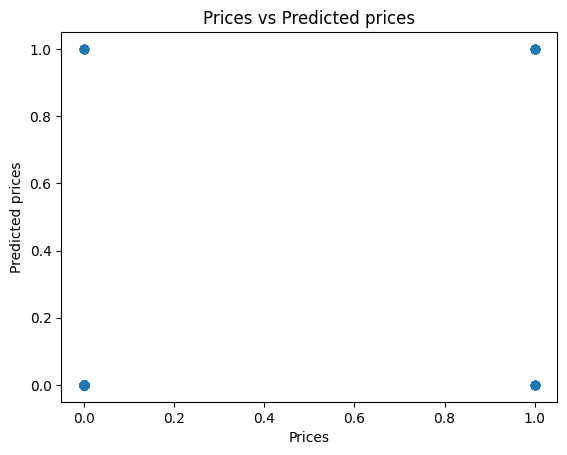

In [28]:
y_pred = gb_cv.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

## SVC

In [29]:
from sklearn.svm import SVC
svc = SVC(random_state = 101)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.89875
Test Score: 0.905


In [30]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(X_test,y_test)

In [31]:
# grid = {
#     'C':[0.01,0.1,1,10],
#     'kernel' : ["linear","poly","rbf","sigmoid"],
#     'degree' : [1,3,5,7],
#     'gamma' : [0.01,1]
# }

# svm  = SVC ()
# svm_cv = GridSearchCV(svm, grid, cv = 5)
# svm_cv.fit(X_train,y_train)
# print("Best Parameters:",svm_cv.best_params_)
# print("Train Score:",svm_cv.best_score_)
# print("Test Score:",svm_cv.score(X_test,y_test))

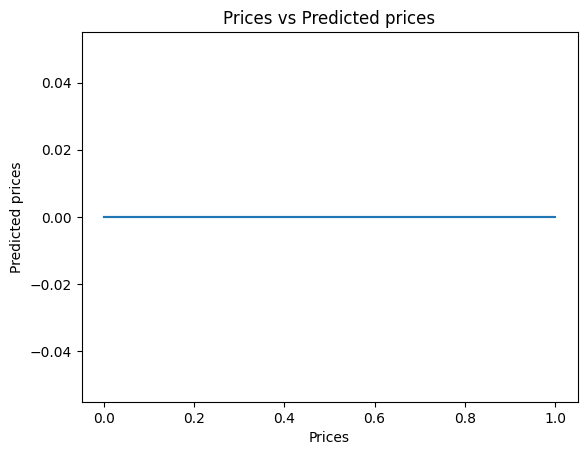

In [32]:
y_pred=svc.predict(X_test)
plt.plot(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [34]:
from sklearn.metrics import classification_report

pred=svc.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       181
         1.0       0.00      0.00      0.00        19

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200



C:\Users\bhargava\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhargava\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhargava\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

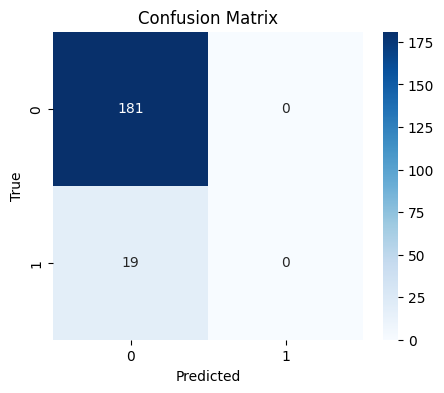

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gradient_booster and X_test, y_test are already defined

# Make predictions
pred = svc.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


classifier = GaussianNB()
accuracies = cross_val_score(classifier, X_train, y_train, cv=5)
classifier.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",classifier.score(X_test,y_test))

Train Score: 0.9375
Test Score: 0.915


In [37]:
result_dict_train["Naive Bayes Default Train Score"] = np.mean(accuracies)
result_dict_test["Naive Bayes Default Test Score"] = classifier.score(X_test,y_test)

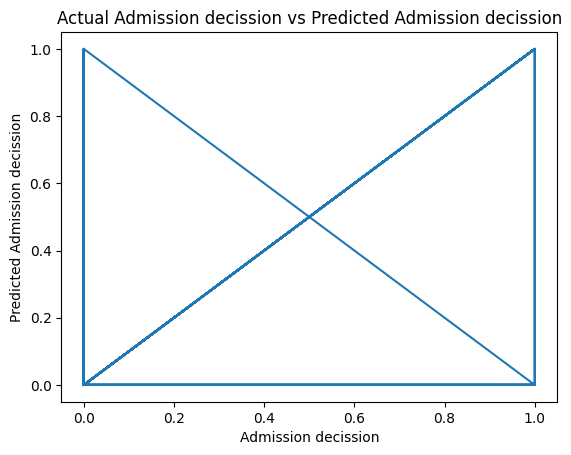

In [38]:
y_pred = classifier.predict(X_test)
plt.plot(y_test, y_pred)
plt.xlabel("Admission decission")
plt.ylabel("Predicted Admission decission")
plt.title("Actual Admission decission vs Predicted Admission decission")
plt.show()

In [39]:
from sklearn.metrics import classification_report

pred=classifier.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       181
         1.0       0.55      0.63      0.59        19

    accuracy                           0.92       200
   macro avg       0.75      0.79      0.77       200
weighted avg       0.92      0.92      0.92       200



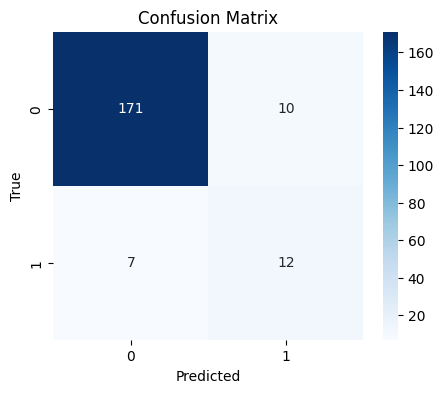

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gradient_booster and X_test, y_test are already defined

# Make predictions
pred = classifier.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Neural Networks

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# # Assuming 'data' is your DataFrame with the given columns
# df = pd.read_csv('D1.csv')
# df.head()
# Drop unnecessary columns
# column_to = ['name', 'id', 'dob', 'nationality', 'mother_tongue']
# df = df.drop(columns=column_to)

# # Convert 'gender' to 0 and 1
# df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

# # Convert 'Admission_status' to 0 and 1
# df['Admission_status'] = df['Admission_status'].replace({'Not Admitted': 0, 'Admitted': 1})

# # Convert 'Admission_status' to integer type
# # df['Admission_status'] = df['Admission_status'].astype(int)


# # Split the data into features and target
# X = df.drop('Admission_status', axis=1)
# y = df['Admission_status']

In [42]:

# Ensure 'y_train' is a NumPy array with the correct data type
y_train = np.array(y_train, dtype=np.float32)  # Use dtype=np.float32 if 'Admission_status' is float


# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so 'sigmoid' activation
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



# history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
# print(f'Test accuracy: {test_acc * 100:.2f}%')

# # Print training accuracy
# train_acc = history.history['accuracy'][-1]
# print(f'Training accuracy: {train_acc * 100:.2f}%')

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ... (Previous code)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict probabilities on the test set
test_acc = model.evaluate(X_test_scaled, y_test)[1]
print(f'Test accuracy: {test_acc*100:.2f}%')
train_acc = history.history['accuracy'][-1]
print(f'Training accuracy: {train_acc * 100:.2f}%')
y_pred_proba = model.predict(X_test_scaled)

# Compute ROC curve and area under the curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(8, 8))
# test_acc = model.evaluate(X_test_scaled, y_test)[1]
print(f'Test accuracy: {test_acc*100:.2f}%')
train_acc = history.history['accuracy'][-1]
print(f'Training accuracy: {train_acc * 100:.2f}%')


Epoch 1/50
20/20 [==============================] - 1s 12ms/step - loss: 0.4448 - accuracy: 0.8938 - val_loss: 0.3286 - val_accuracy: 0.8938
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2847 - accuracy: 0.9000 - val_loss: 0.2603 - val_accuracy: 0.8938
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2342 - accuracy: 0.9000 - val_loss: 0.2251 - val_accuracy: 0.8938
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.2041 - accuracy: 0.9125 - val_loss: 0.1988 - val_accuracy: 0.9125
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1849 - accuracy: 0.9219 - val_loss: 0.1849 - val_accuracy: 0.9250
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9328 - val_loss: 0.1830 - val_accuracy: 0.9250
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.1691 - accuracy: 0.9406 - val_loss: 0.1773 - val_accuracy: 0.9500
Epoch 8/50
20/20 [=

In [44]:
from sklearn.metrics import classification_report

# Assuming you have trained your model as described in your code
# and you have X_test_scaled and y_test

# Make predictions on the test set
y_probs = model.predict(X_test_scaled)
y_pred = (y_probs > 0.5).astype(int)  # Assuming a threshold of 0.5 for binary classification

# Convert y_test to 1D array if it's not already
y_test = np.squeeze(y_test)

# Print the classification report
print(classification_report(y_test, y_pred))

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       181
         1.0       0.57      0.42      0.48        19

    accuracy                           0.92       200
   macro avg       0.76      0.69      0.72       200
weighted avg       0.91      0.92      0.91       200



7/7 [==============================] - 0s 2ms/step


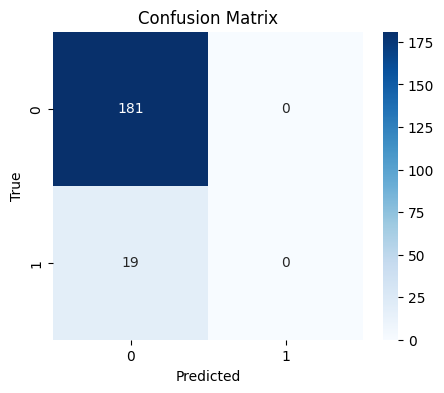

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_test, y_test, and model are already defined

# Make predictions
y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## ROC curve

In [46]:
# # auc roc curve

# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# # generate two class dataset
# X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# # split into train-test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)



# # train models
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier

# # logistic regression
# model1 = LogisticRegression()
# # knn
# model2 = KNeighborsClassifier(n_neighbors=4)

# # fit model
# model1.fit(X_train, y_train)
# model2.fit(X_train, y_train)

# # predict probabilities
# pred_prob1 = model1.predict_proba(X_test)
# pred_prob2 = model2.predict_proba(X_test)


# from sklearn.metrics import roc_curve

# # roc curve for models
# fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
# fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# # roc curve for tpr = fpr 
# random_probs = [0 for i in range(len(y_test))]
# p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# from sklearn.metrics import roc_auc_score

# # auc scores
# auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
# auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

# print(auc_score1, auc_score2)

7/7 [==============================] - 0s 3ms/step


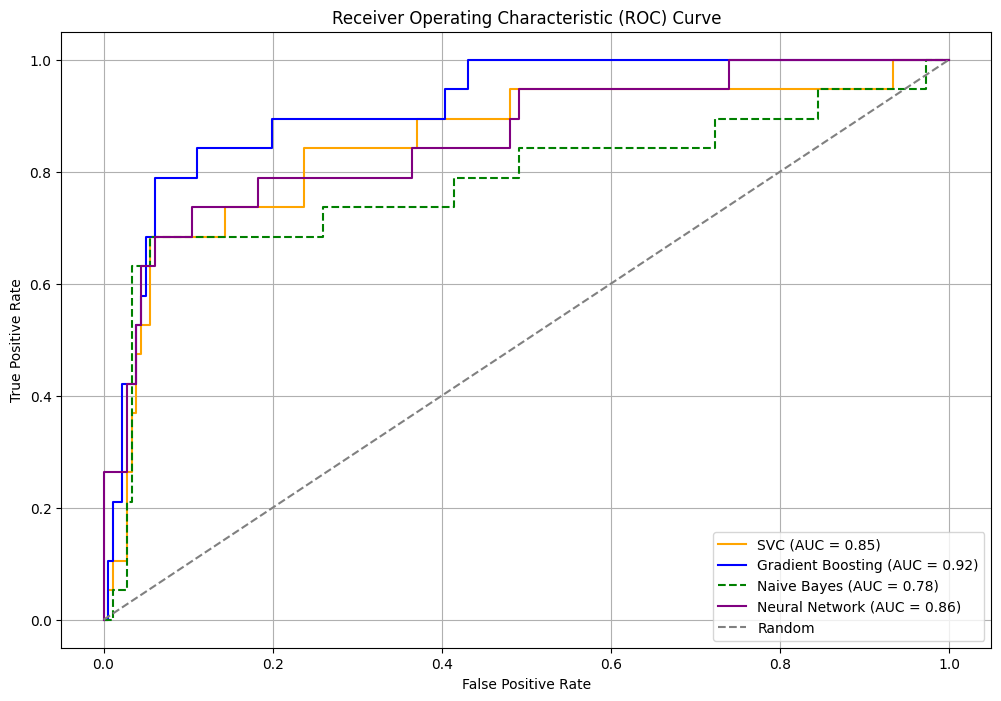

In [47]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have trained classifiers named svc, gradient_booster, and classifier
classifiers = [svc, gradient_booster, classifier]
labels = ['SVC', 'Gradient Boosting', 'Naive Bayes', 'Neaural Network']
colors = ['orange', 'blue', 'green', 'yellow']

# Initialize a plot
plt.figure(figsize=(12, 8))

# Plot ROC curve for each classifier
for classifier, label, color in zip(classifiers, labels, colors):
    # Assuming X_test and y_test are your test data
    if isinstance(classifier, SVC):
        y_scores = classifier.decision_function(X_test)
    else:
        y_scores = classifier.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve with different line styles and colors
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})', color=color, linestyle='--' if label == 'Naive Bayes' else '-')

# Plot ROC curve for the neural network
y_probs = model.predict(X_test_scaled)
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_probs)
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})', color='purple', linestyle='-')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
